In [8]:
pip install astropy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 20.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.3/334.3 kB 10.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# need to install plotly on TACC Machines
import plotly.graph_objs as go

from mpl_toolkits.mplot3d import Axes3D

import math
import random

%matplotlib notebook

In [5]:
# read in csv
sdssDF = pd.read_csv('Galaxy5.csv')

In [6]:
sampleDF = sdssDF[['ra', 'dec', 'z']]
sampleDF.columns = ['ra', 'dec', 'redshift']
sampleDF

,ra,dec,redshift
0,145.34053,0.019135,0.120293
1,145.25355,-0.107234,0.484813
2,145.23331,-0.435672,0.221124
3,145.21905,-0.186154,0.123589
4,145.31208,-0.400766,0.336823
...,...,...,...
2790248,262.32827,52.933132,0.349172
2790249,262.38640,52.959427,0.084946
2790250,262.49796,53.046479,0.052209
2790251,263.09480,53.161608,0.109950


In [7]:
ra = tuple(sampleDF['ra'])
dec = tuple(sampleDF['dec'])
redshift = tuple(sampleDF['redshift'])

In [8]:
import astropy.units as u
import astropy.coordinates

raGalactic = []
decGalactic = []

for i in range(len(sampleDF['ra'])):
    coord = astropy.coordinates.SkyCoord(
        ra=sampleDF['ra'][i] * u.degree,
        dec=sampleDF['dec'][i] * u.degree,
        frame='icrs'
    )
    coord = coord.transform_to('galactic')
    raGalactic.append(coord.l.deg)
    decGalactic.append(coord.b.deg)

In [9]:
sampleDF['raGalactic'] = raGalactic
sampleDF['decGalactic'] = decGalactic

In [10]:
sampleDF

,ra,dec,redshift,raGalactic,decGalactic
0,145.34053,0.019135,0.120293,235.575472,36.956065
1,145.25355,-0.107234,0.484813,235.643155,36.812524
2,145.23331,-0.435672,0.221124,235.964663,36.607952
3,145.21905,-0.186154,0.123589,235.699426,36.739128
4,145.31208,-0.400766,0.336823,235.985364,36.692492
...,...,...,...,...,...
2790248,262.32827,52.933132,0.349172,80.327815,33.503116
2790249,262.38640,52.959427,0.084946,80.360637,33.468925
2790250,262.49796,53.046479,0.052209,80.467449,33.404582
2790251,263.09480,53.161608,0.109950,80.620145,33.050558


In [11]:
sampleDF.to_csv('GalacticCoordsGalaxies5.csv')

In [12]:
cost = [9581122.763368431, 9491352.9964327, 9359831.817188669, 9257020.717303345, 9171958.454713074, 9103422.60951039, 8989254.574758211, 8907289.017031863, 8775280.090825219, 8681979.006068317, 8644614.967798835, 8501933.558632314, 8399294.902562955, 8347905.844277649, 8305058.702626604, 8192802.7056984035, 8128801.443307339, 8033907.730341633, 7943930.712298513, 7861137.517520569]

Text(0, 0.5, 'Squared Error (Cost)')

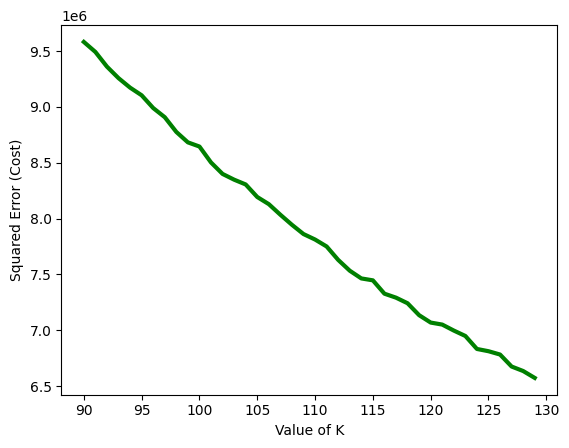

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

cost = [9581122.763368431, 9491352.9964327, 9359831.817188669, 9257020.717303345, 9171958.454713074, 9103422.60951039, 8989254.574758211, 8907289.017031863, 8775280.090825219, 8681979.006068317, 8644614.967798835, 8501933.558632314, 8399294.902562955, 8347905.844277649, 8305058.702626604, 8192802.7056984035, 8128801.443307339, 8033907.730341633, 7943930.712298513, 7861137.517520569, 7812105.865620453, 7749957.30683738, 7629692.839720511, 7533122.062673031, 7463852.813604562, 7446647.959260652, 7327238.942848369, 7291670.142017058, 7241599.67408318, 7134856.116859635, 7068711.597165943, 7050626.524980849, 6997080.693356358, 6948604.725982913, 6832442.389696994, 6812159.567253606, 6782468.4787331475, 6675091.553162177, 6634886.866910716, 6573114.396147624]

# Plot the cost against K values
plt.plot(range(90, 130), cost, color='g', linewidth=3)
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")